# Parte 1

# Dataset Kindle Reviews

In [1]:
import torch
torch.cuda.empty_cache()

In [2]:
import numpy as np

with open('kindledata.txt', 'r', encoding="utf8") as f:
    ttdata = f.read()
with open('kindlelabels.txt', 'r', encoding="utf8") as f:
    ttlabels = f.read()

In [3]:
print(ttdata[:1000])
print()
print(ttlabels[:20])

This book was the very first bookmobile book I bought when I was in the school book club. I loved the story then and I bet a dollar to a donut I will love it again. If my memory serves, I bought this book in 5th grade. That would have been about 1961. I am looking forward to reliving the memories.
When I read the description for this book, I couldn't wait to read it. Once I downloaded it to my Kindle, I found it extremely hard to keep reading it.  To be honest, I stopped reading halfway through the book. It began slow and remained a slow, uninteresting read.  It lacked passion; not making love passion, but passion for life. Neither Jada or Aaron were interesting characters and the story was too, too `everything is perfect'.  Everybody is just so understanding and accommodating--the bit of drama with his father and her grandmother was blah.  To give an example of what I mean (and there are MANY), Aaron finally finds out almost  half way into the book that he fathered a child 5 years ago

In [4]:
from string import punctuation
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer() 

def lemmatizeSentence(sentence):
    token_words=word_tokenize(sentence) 
#we need to tokenize the sentence or else lemmatizing will return the entire sentence as is.
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word))
        lemma_sentence.append(" ")
    return ''.join(lemma_sentence)


ttdata = ttdata.lower() # passando tudo para minusculo
all_text1 = ''.join([c for c in ttdata if c not in punctuation]) # removendo pontuação

ttdata_split = all_text1.split('\n')

ttdata_split_pp = []

for review in ttdata_split: # aplicando lemmatization em todas as avaliações
    ttdata_split_pp.append(lemmatizeSentence(review))
    
all_text1 = ' '.join(ttdata_split_pp)

wordstt = all_text1.split()

In [5]:
wordstt[:15]

['this',
 'book',
 'wa',
 'the',
 'very',
 'first',
 'bookmobile',
 'book',
 'i',
 'bought',
 'when',
 'i',
 'wa',
 'in',
 'the']

In [6]:
#2=positivo, 1=neutro, 0=negativo conversão dos labels para números
labels_split1 = ttlabels.split('\n')
encoded_labels1 = np.array([4 if label == '5' else 3 if label == '4' else 2 if label == '3' else 1 if label == '2' else 0 for label in labels_split1])

classes1 = ('1 Estrela', '2 Estrelas', '3 Estrelas', '4 Estrelas', '5 Estrelas')

In [7]:
encoded_labels1[:30]

array([4, 0, 4, 4, 4, 3, 2, 4, 3, 0, 3, 0, 4, 4, 1, 2, 4, 2, 2, 3, 4, 1,
       4, 1, 3, 4, 4, 2, 4, 4])

# Dataset IMDB reviews

In [8]:
with open('moviedata.txt', 'r', encoding="utf8") as f:
    mvdata = f.read()
with open('movielabels.txt', 'r', encoding="utf8") as f:
    mvlabels = f.read()

In [9]:
print(mvdata[:1000])
print()
print(mvlabels[:20])

I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.
When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that t

In [10]:
mvdata = mvdata.lower() # passando tudo para minusculo
all_text2 = ''.join([c for c in mvdata if c not in punctuation]) # removendo pontuação

mvdata_split = all_text2.split('\n')

mvdata_split_pp = mvdata_split

#for review in mvdata_split: # aplicando lemmatization em todas as avaliações
 #   mvdata_split_pp.append(lemmatizeSentence(review))
    
all_text2 = ' '.join(mvdata_split_pp)

mvwords = all_text2.split()

In [11]:
mvwords[:30]

['i',
 'grew',
 'up',
 'b',
 '1965',
 'watching',
 'and',
 'loving',
 'the',
 'thunderbirds',
 'all',
 'my',
 'mates',
 'at',
 'school',
 'watched',
 'we',
 'played',
 'thunderbirds',
 'before',
 'school',
 'during',
 'lunch',
 'and',
 'after',
 'school',
 'we',
 'all',
 'wanted',
 'to']

In [12]:
#1=positive, 0=negative conversão de label
labels_split2 = mvlabels.split('\n')
labels_split2 = list(map(int, labels_split2))
encoded_labels2 = np.array(labels_split2)
classes2= ('Positivo', 'Negativo')

In [13]:
encoded_labels2

array([0, 0, 0, ..., 0, 1, 1])

## Fundindo os dois Datasets para criar um dicionário de palavras único

In [14]:
from collections import Counter
words = mvwords + wordstt

## Gerando o dicionario com as palavras e seus códigos
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

f = open('dicionarioTodasPalavras.txt', 'w', encoding="utf8") # salvando o dicionário em um arquivo txt
f.write(str(vocab_to_int))
f.close()

## Tokenizando as avaliações dos dois datasets de acordo com o dicionário

In [15]:
ttdata_ints = []
for review in ttdata_split_pp:
    ttdata_ints.append([vocab_to_int[word] for word in review.split()])
    
mvdata_ints = []
for review in mvdata_split_pp:
    mvdata_ints.append([vocab_to_int[word] for word in review.split()])

## Remoção de avaliações vazias

In [16]:
# outlier review stats
mvdata_lens = Counter([len(x) for x in mvdata_ints])
print("Avaliações vazias: {}".format(mvdata_lens[0]))
print("Tamanho máximo da avaliação: {}".format(max(mvdata_lens)))

# outlier review stats
ttdata_lens = Counter([len(x) for x in ttdata_ints])
print("Avaliações vazias: {}".format(ttdata_lens[0]))
print("Tamanho máximo da avaliação: {}".format(max(ttdata_lens)))

Avaliações vazias: 0
Tamanho máximo da avaliação: 2469
Avaliações vazias: 0
Tamanho máximo da avaliação: 2146


In [17]:
print('Numero de avaliações antes da remoção: ', len(ttdata_ints))
print('Numero de labels antes da remoção: ', len(encoded_labels1))

## remove any reviews/labels with zero length from the reviews_ints list.

# get indices of any reviews with length 0
non_zero_idx1 = [ii for ii, review in enumerate(ttdata_ints) if len(review) != 0]

# remove 0-length reviews and their labels
ttdata_ints = [ttdata_ints[ii] for ii in non_zero_idx1]
encoded_labels1 = np.array([encoded_labels1[ii] for ii in non_zero_idx1])

print('Numero de avaliações depois da remoção', len(ttdata_ints))
print('Numero de labels depois da remoção: ', len(encoded_labels1))

Numero de avaliações antes da remoção:  12000
Numero de labels antes da remoção:  12000
Numero de avaliações depois da remoção 12000
Numero de labels depois da remoção:  12000


In [18]:
print('Numero de avaliações antes da remoção: ', len(mvdata_ints))
print('Numero de labels antes da remoção: ', len(encoded_labels2))

## remove any reviews/labels with zero length from the reviews_ints list.

# get indices of any reviews with length 0
non_zero_idx2 = [ii for ii, review in enumerate(mvdata_ints) if len(review) != 0]

# remove 0-length reviews and their labels
mvdata_ints = [mvdata_ints[ii] for ii in non_zero_idx2]
encoded_labels2 = np.array([encoded_labels2[ii] for ii in non_zero_idx2])

print('Numero de avaliações depois da remoção', len(mvdata_ints))
print('Numero de labels depois da remoção: ', len(encoded_labels2))

Numero de avaliações antes da remoção:  40000
Numero de labels antes da remoção:  40000
Numero de avaliações depois da remoção 40000
Numero de labels depois da remoção:  40000


## Truncando o tamanho das avaliações

In [19]:
def pad_features(reviews_ints, seq_length): #trunca as avaliações depois de um certo tamanho
    
    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)

    # for each review, I grab that review and 
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [20]:
seq_length = 50 #tamanho para truncar

features1 = pad_features(ttdata_ints, seq_length=seq_length)

## test statements - do not change - ##
assert len(features1)==len(ttdata_ints), "Your features should have as many rows as reviews."
assert len(features1[0])==seq_length, "Each feature row should contain seq_length values."

# print first 10 values of the first 30 batches 
print(features1[:30,:10])

[[    10     70     75      1     53     83 162514     70      8    956]
 [    54      8    116      1   1244     13     10     70      8    367]
 [     8     40     62      5   5442     10    455     10     70      6]
 [     8     89   1576    649    624    420     80      8     40     89]
 [    10    212      1    235      4     70      8   1576    116    264]
 [     8     59    336     84     10     46   1075      9      2   3986]
 [     8    956     10     70     80      8    315      1    830      3]
 [    10     75      2     70     11      8   1438    336     37      1]
 [    43      1     83   2880     79      1    158     75      2  13250]
 [     8    956     10    282      3   3214      9      8    367   1059]
 [     8    116   1896    455     19   2145      3  16019     15      8]
 [     1     66    140     11    177     63      5      1    125      4]
 [    99      1   1873     81    627     15   8305     55   8679    674]
 [     0      0      0      0      0      0      0 

In [21]:
seq_length = 120  #numero para truncar o tamanho da avaliação

features2 = pad_features(mvdata_ints, seq_length=seq_length)

## test statements - do not change - ##
assert len(features2)==len(mvdata_ints), "Your features should have as many rows as reviews."
assert len(features2[0])==seq_length, "Each feature row should contain seq_length values."

# print first 10 values of the first 30 batches 
print(features2[:30,:10])

[[    8  1996    57  1006  9174   164     3  1488     1  9521]
 [   54     8   248    10    18     7    55   313  1778     3]
 [  138    85    91    39    85    21   109    47     2   836]
 [    0     0     0     0     0     0     0     0     0     0]
 [  139     2   825   252  7311  1260   322     3   166    73]
 [    0     0     0     0     0     0     0     0     0     0]
 [  402   318    10  1643    18   231   305     3    47     2]
 [    8   964    10    20    19 48966    19  2162     9  2177]
 [    9   204    27     1  1105     4  6111 77946   613   100]
 [   55  1408  2720  1065   635    44     5    27     2  2065]
 [    8   170   259    91    23   257    13     2   114     7]
 [   43    22   717   120     1 13558   122   272   158    94]
 [    0     0     0     0     0     0     0     0     0     0]
 [ 4605  2087     3  7938 17948   173    48  5962  6881    32]
 [    2 12549   600     5   730  4966 17028    79     1   728]
 [   43    22   157     2   236  4739    14  4525     4

# Análise dos Datasets

In [22]:
iguais = 0
unicas = 0
exc_primeira = 0
exc_segunda = 0

counts1 = Counter(wordstt)
vocab1 = sorted(counts1, key=counts1.get, reverse=True)

counts2 = Counter(mvwords)
vocab2 = sorted(counts2, key=counts2.get, reverse=True)

for word1 in vocab1:
    for word2 in vocab2:
        if word1 == word2:
            iguais = iguais + 1
            
exc_primeira = len(vocab1) - iguais
exc_segunda = len(vocab2) - iguais

unicas = exc_primeira + exc_segunda

In [23]:
print("O número de palavras iguais entre os dois datasets é de " + str(iguais))

O número de palavras iguais entre os dois datasets é de 23866


In [24]:
print("O número de palavras únicas entre os dois datasets é de " + str(unicas))

O número de palavras únicas entre os dois datasets é de 155720


In [25]:
print("O número de palavras exclusivas do primeiro dataset é de " + str(exc_primeira))

O número de palavras exclusivas do primeiro dataset é de 19277


In [26]:
print("O número de palavras exclusivas do segundo dataset é de " + str(exc_segunda))

O número de palavras exclusivas do segundo dataset é de 136443


# Parte 2

## Dividindo o dataset IMDB em treino, teste e validação

In [27]:
split_frac1 = 0.8

## dividir o dataset em treino, validação e teste

split_idx1 = int(len(features2)*split_frac1)
train_x1, remaining_x1 = features2[:split_idx1], features2[split_idx1:]
train_y1, remaining_y1 = encoded_labels2[:split_idx1], encoded_labels2[split_idx1:]

test_idx1 = int(len(remaining_x1)*0.5)
val_x1, test_x1 = remaining_x1[:test_idx1], remaining_x1[test_idx1:]
val_y1, test_y1 = remaining_y1[:test_idx1], remaining_y1[test_idx1:]

## printa os tamanhos dos sets
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x1.shape), 
      "\nValidation set: \t{}".format(val_x1.shape),
      "\nTest set: \t\t{}".format(test_x1.shape))

			Feature Shapes:
Train set: 		(32000, 120) 
Validation set: 	(4000, 120) 
Test set: 		(4000, 120)


## Definindo os DataLoaders do primeiro Dataset

In [28]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# criando os datasets
train_data1 = TensorDataset(torch.from_numpy(train_x1), torch.from_numpy(train_y1))
valid_data1 = TensorDataset(torch.from_numpy(val_x1), torch.from_numpy(val_y1))
test_data1 = TensorDataset(torch.from_numpy(test_x1), torch.from_numpy(test_y1))

# dataloaders
batch_size1 = 50

# criando os dataloaders
train_loader1 = DataLoader(train_data1, shuffle=True, batch_size=batch_size1, drop_last=True)
valid_loader1 = DataLoader(valid_data1, shuffle=True, batch_size=batch_size1, drop_last=True)
test_loader1 = DataLoader(test_data1, shuffle=True, batch_size=batch_size1, drop_last=True)

In [29]:
# obtendo um batch
dataiter = iter(train_loader1)
sample_x1, sample_y1 = dataiter.next()

print('Sample input size: ', sample_x1.size()) # batch_size, seq_length
print('Sample input: \n', sample_x1)
print()
print('Sample label size: ', sample_y1.size()) # batch_size
print('Sample label: \n', sample_y1)

Sample input size:  torch.Size([50, 120])
Sample input: 
 tensor([[  264,    10,    18,  ...,   152,   671,   870],
        [    8,    73,   112,  ...,  4309,    30,     1],
        [15474,  6484,  2817,  ...,    51,    77,  1133],
        ...,
        [18178,     6,     2,  ...,    72,  1071,  1922],
        [   74,    84,     5,  ...,  1058,     5,  2884],
        [    0,     0,     0,  ...,     5,    27,  1864]], dtype=torch.int32)

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 0], dtype=torch.int32)


In [30]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


## Definindo o modelo

In [31]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.3):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(drop_prob)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out[:, -1, :] # getting the last time step output
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                    weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                    weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
        

In [32]:
# Intanciar o modelo e os parametros
vocab_size1 = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size1 = 1
embedding_dim1 = 500
hidden_dim1 = 256
n_layers1 = 2

net = SentimentRNN(vocab_size1, output_size1, embedding_dim1, hidden_dim1, n_layers1)

print(net)

SentimentRNN(
  (embedding): Embedding(179587, 500)
  (lstm): LSTM(500, 256, num_layers=2, batch_first=True, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


## Criando a função de treinamento

In [33]:
def treino(model_name, net, train_loader, valid_loader, lr, criterion, optimizer, epochs, batch_size):
    loss_arr = []
    counter = 0
    print_every = 100
    clip=5 # gradient clipping
    
    # move model to GPU, if available
    
    if(train_on_gpu):
        net.cuda()

    net.train()
    # train for some number of epochs
    
    val_loss_min = np.Inf
    
    for e in range(epochs):
        # initialize hidden state
        h = net.init_hidden(batch_size)

        # batch loop
        for inputs, labels in train_loader:
            counter += 1

            if(train_on_gpu):
                inputs, labels = inputs.cuda(), labels.cuda()

            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            h = tuple([each.data for each in h])

            # zero accumulated gradients
            net.zero_grad()

            # get the output from the model
            output, h = net(inputs, h)

            # calculate the loss and perform backprop
            loss = criterion(output.squeeze(), labels.float())
            loss.backward()
            
            loss_arr.append(loss.item())
            
            optimizer.step()

            # loss stats
            if counter % print_every == 0:
                # Get validation loss
                val_h = net.init_hidden(batch_size)
                val_losses = []
                net.eval()
                for inputs, labels in valid_loader:

                    # Creating new variables for the hidden state, otherwise
                    # we'd backprop through the entire training history
                    val_h = tuple([each.data for each in val_h])

                    if(train_on_gpu):
                        inputs, labels = inputs.cuda(), labels.cuda()

                    output, val_h = net(inputs, val_h)
                    val_loss = criterion(output.squeeze(), labels.float())

                    val_losses.append(val_loss.item())

                net.train()
                print("Epoch: {}/{}...".format(e+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.6f}...".format(loss.item()),
                      "Val Loss: {:.6f}".format(np.mean(val_losses)))
                
                if val_loss <= val_loss_min:
                    print('Loss de Validação caiu ({:.6f} --> {:.6f}).  Saving model ...'.format(
                    val_loss_min,
                    val_loss))
                    torch.save(net.state_dict(), model_name+'.pt')
                    val_loss_min = val_loss
    return loss_arr

In [34]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# training params

epochs = 3 # 3-4 is approx where I noticed the validation loss stop decreasing

loss_arr1 = treino("parte2", net, train_loader1, valid_loader1, lr, criterion, optimizer, epochs, batch_size1)

Epoch: 1/3... Step: 100... Loss: 0.699372... Val Loss: 0.673181
Loss de Validação caiu (inf --> 0.679410).  Saving model ...
Epoch: 1/3... Step: 200... Loss: 0.648301... Val Loss: 0.596170
Loss de Validação caiu (0.679410 --> 0.636467).  Saving model ...
Epoch: 1/3... Step: 300... Loss: 0.696138... Val Loss: 0.692993
Epoch: 1/3... Step: 400... Loss: 0.702436... Val Loss: 0.693514
Epoch: 1/3... Step: 500... Loss: 0.695482... Val Loss: 0.693311
Epoch: 1/3... Step: 600... Loss: 0.699243... Val Loss: 0.696839
Epoch: 2/3... Step: 700... Loss: 0.702876... Val Loss: 0.689897
Epoch: 2/3... Step: 800... Loss: 0.625051... Val Loss: 0.677807
Epoch: 2/3... Step: 900... Loss: 0.458742... Val Loss: 0.534792
Loss de Validação caiu (0.636467 --> 0.598419).  Saving model ...
Epoch: 2/3... Step: 1000... Loss: 0.613522... Val Loss: 0.593878
Epoch: 2/3... Step: 1100... Loss: 0.368318... Val Loss: 0.464080
Loss de Validação caiu (0.598419 --> 0.512115).  Saving model ...
Epoch: 2/3... Step: 1200... Loss: 0

## Criando a função de teste

In [35]:
def teste(net, test_loader, classes, lr, criterion):
    
    test_loss = 0.0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    
    counter = 0
    print_every = 100
    clip=5 # gradient clipping


    # Get test data loss and accuracy

    test_losses = [] # track loss
    num_correct = 0

    # init hidden state
    h = net.init_hidden(50)

    net.eval()
    # iterate over test data
    for inputs, labels in test_loader:

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # get predicted outputs
        output, h = net(inputs, h)

        # calculate loss
        test_loss = criterion(output.squeeze(), labels.float())
        test_losses.append(test_loss.item())

        # convert output probabilities to predicted class (0 or 1)
        pred = torch.round(output.squeeze())  # rounds to the nearest integer

        # compare predictions to true label
        correct_tensor = pred.eq(labels.float().view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        num_correct += np.sum(correct)
        for i in range(len(inputs)):
            label = labels.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1


    # -- stats! -- ##
    # avg test loss
    print("Test loss: {:.3f}".format(np.mean(test_losses)))

    for i in range(len(classes)):
        if class_total[i] > 0:
            print('Precisão de Teste de %5s: %2d%% (%2d/%2d)' % (
                classes[i], 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Precisão de Teste de %5s: N/A (no training examples)' % (classes[i]))

    print('\nPrecisão de Teste (Geral): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

In [36]:
net.load_state_dict(torch.load('parte2.pt')) #carregar modelo já treinado

teste(net, test_loader1, classes2, lr, criterion)

Test loss: 0.461
Precisão de Teste de Positivo: 77% (1566/2016)
Precisão de Teste de Negativo: 83% (1647/1984)

Precisão de Teste (Geral): 80% (3213/4000)


# Parte 3

Treinamento de um modelo utilizando os mesmos parametros da camada de embedding da Parte 2 e congelando-os. O dataset Financial foi utilizado.

## Dividindo o dataset Kindle em treino, teste e validação

In [37]:
import torch
torch.cuda.empty_cache()

In [38]:
split_frac2 = 0.8

## dividir o dataset em treino, validação e teste

split_idx2 = int(len(features1)*split_frac2)
train_x2, remaining_x2 = features1[:split_idx2], features1[split_idx2:]
train_y2, remaining_y2 = encoded_labels1[:split_idx2], encoded_labels1[split_idx2:]

test_idx2 = int(len(remaining_x2)*0.5)
val_x2, test_x2 = remaining_x2[:test_idx2], remaining_x2[test_idx2:]
val_y2, test_y2 = remaining_y2[:test_idx2], remaining_y2[test_idx2:]

## printa os tamanhos dos sets
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x2.shape), 
      "\nValidation set: \t{}".format(val_x2.shape),
      "\nTest set: \t\t{}".format(test_x2.shape))

			Feature Shapes:
Train set: 		(9600, 50) 
Validation set: 	(1200, 50) 
Test set: 		(1200, 50)


In [39]:
print(len(encoded_labels1))
print(len(features1))

12000
12000


## Definindo os DataLoader do segundo Dataset

In [40]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# criando os datasets
train_data2 = TensorDataset(torch.from_numpy(train_x2), torch.from_numpy(train_y2))
valid_data2 = TensorDataset(torch.from_numpy(val_x2), torch.from_numpy(val_y2))
test_data2 = TensorDataset(torch.from_numpy(test_x2), torch.from_numpy(test_y2))

# dataloaders
batch_size2 = 50

# criando os dataloaders
train_loader2 = DataLoader(train_data2, shuffle=True, batch_size=batch_size2, drop_last=True)
valid_loader2 = DataLoader(valid_data2, shuffle=True, batch_size=batch_size2, drop_last=True)
test_loader2 = DataLoader(test_data2, shuffle=True, batch_size=batch_size2, drop_last=True)

In [41]:
# obtendo um batch para vizualização
dataiter = iter(train_loader2)
sample_x2, sample_y2 = dataiter.next()

print('Sample input size: ', sample_x2.size()) # batch_size, seq_length
print('Sample input: \n', sample_x2)
print()
print('Sample label size: ', sample_y2.size()) # batch_size
print('Sample label: \n', sample_y2)

Sample input size:  torch.Size([50, 50])
Sample input: 
 tensor([[   47,     2,  1399,  ...,   187,     1,   105],
        [    0,     0,     0,  ...,    15, 17149,   699],
        [    0,     0,     0,  ...,     3, 12636,  8851],
        ...,
        [ 4644,   929,   145,  ...,     7,    35,    88],
        [ 5097,  5855,  5165,  ...,     1,  1447,  1634],
        [   10,     6,   423,  ...,  3911,   144,   116]], dtype=torch.int32)

Sample label size:  torch.Size([50])
Sample label: 
 tensor([2, 1, 2, 0, 4, 3, 3, 2, 4, 4, 4, 2, 3, 0, 4, 1, 4, 2, 0, 4, 1, 4, 0, 4,
        2, 2, 0, 4, 2, 4, 3, 2, 3, 3, 3, 3, 4, 0, 2, 0, 0, 4, 4, 4, 4, 0, 0, 4,
        3, 4], dtype=torch.int32)


## Criando o segundo modelo com os parametros do segundo dataset

Aqui ocorre a copia dos parametros de embbeding do primeiro modelo para o segundo e o seu congelamento.

In [42]:
import torch.nn as nn

class SentimentRNN2(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.4):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN2, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(drop_prob)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out[:, -1, :] # getting the last time step output
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)

        return out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                    weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                    weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [43]:
# instanciando o modelo e definindo os parametros
vocab_size2 = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size2 = 5
embedding_dim2 = 500
hidden_dim2 = 256
n_layers2 = 2

net2 = SentimentRNN2(vocab_size2, output_size2, embedding_dim2, hidden_dim2, n_layers2)

net2.embedding.weight = net.embedding.weight #Copia os pesos da camada de embedding do primeiro modelo
net2.cpu()

for param in net2.embedding.parameters(): #Congela a camada de embedding copiada
    param.requires_grad = False

print(net2)

SentimentRNN2(
  (embedding): Embedding(179587, 500)
  (lstm): LSTM(500, 256, num_layers=2, batch_first=True, dropout=0.4)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc): Linear(in_features=256, out_features=5, bias=True)
)


## Definindo a função de treino 

Outra função é definida para que o CrossEntropyLoss funcione.

In [44]:
def treino2(model_name, net, train_loader, valid_loader, lr, criterion, optimizer, epochs, batch_size):
    loss_arr = []
    counter = 0
    print_every = 100
    clip=5 # gradient clipping
    
    # move model to GPU, if available
    
    if(train_on_gpu):
        net.cuda()

    net.train()
    # train for some number of epochs
    
    val_loss_min = np.Inf
    
    for e in range(epochs):
        # initialize hidden state
        h = net.init_hidden(batch_size)

        # batch loop
        for inputs, labels in train_loader:
            counter += 1

            if(train_on_gpu):
                inputs, labels = inputs.cuda(), labels.cuda()

            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            h = tuple([each.data for each in h])

            # zero accumulated gradients
            net.zero_grad()

            # get the output from the model
            output, h = net(inputs, h)

            # calculate the loss and perform backprop
            loss = criterion(output, labels.to(torch.long))
            loss.backward()
            
            loss_arr.append(loss.item())
            
            optimizer.step()

            # loss stats
            if counter % print_every == 0:
                # Get validation loss
                val_h = net.init_hidden(batch_size)
                val_losses = []
                net.eval()
                for inputs, labels in valid_loader:

                    # Creating new variables for the hidden state, otherwise
                    # we'd backprop through the entire training history
                    val_h = tuple([each.data for each in val_h])

                    if(train_on_gpu):
                        inputs, labels = inputs.cuda(), labels.cuda()

                    output, val_h = net(inputs, val_h)
                    val_loss = criterion(output, labels.to(torch.long))

                    val_losses.append(val_loss.item())

                net.train()
                print("Epoch: {}/{}...".format(e+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.6f}...".format(loss.item()),
                      "Val Loss: {:.6f}...".format(np.mean(val_losses)))
                
                if val_loss <= val_loss_min:
                    print('Loss de Validação caiu ({:.6f} --> {:.6f}).  Saving model ...'.format(
                    val_loss_min,
                    val_loss))
                    torch.save(net.state_dict(), model_name+'.pt')
                    val_loss_min = val_loss
    return loss_arr

In [45]:
import torch.optim as optim

# loss and optimization functions
epochs2 = 3
lr2 = 0.001

criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(net2.parameters(), lr=lr2)


# parametros de treino

loss_arr2 = treino2("parte3", net2, train_loader2, valid_loader2, lr2, criterion2, optimizer2, epochs2, batch_size2)


Epoch: 1/3... Step: 100... Loss: 1.430750... Val Loss: 1.416810...
Loss de Validação caiu (inf --> 1.382201).  Saving model ...
Epoch: 2/3... Step: 200... Loss: 1.346359... Val Loss: 1.370716...
Epoch: 2/3... Step: 300... Loss: 1.181653... Val Loss: 1.349696...
Loss de Validação caiu (1.382201 --> 1.312368).  Saving model ...
Epoch: 3/3... Step: 400... Loss: 1.155471... Val Loss: 1.351131...
Loss de Validação caiu (1.312368 --> 1.253083).  Saving model ...
Epoch: 3/3... Step: 500... Loss: 0.975092... Val Loss: 1.389101...
Loss de Validação caiu (1.253083 --> 1.167099).  Saving model ...


In [46]:
def teste2(net, test_loader, classes, lr, criterion, batch_size):
    
    test_loss = 0.0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    
    counter = 0
    print_every = 100
    clip=5 # gradient clipping


    # Get test data loss and accuracy

    test_losses = [] # track loss
    num_correct = 0

    # init hidden state
    h = net.init_hidden(batch_size)

    net.eval()
    # iterate over test data
    for inputs, labels in test_loader:

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # get predicted outputs
        output, h = net(inputs, h)

        # calculate loss
        test_loss = criterion(output, labels.to(torch.long))
        test_losses.append(test_loss.item())

        _, pred = torch.max(output, 1)

        # compare predictions to true label
        correct_tensor = pred.eq(labels.data.view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        num_correct += np.sum(correct)
        for i in range(len(inputs)):
            label = labels.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1


    # -- stats! -- ##
    # avg test loss
    print("Test loss: {:.3f}".format(np.mean(test_losses)))

    for i in range(len(classes)):
        if class_total[i] > 0:
            print('Precisão de Teste de %5s: %2d%% (%2d/%2d)' % (
                classes[i], 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Precisão de Teste de %5s: N/A (no training examples)' % (classes[i]))

    print('\nPrecisão de Teste (Geral): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

In [47]:
net2.load_state_dict(torch.load('parte3.pt'))

teste2(net2, test_loader2, classes1, lr, criterion2, batch_size2)

Test loss: 1.372
Precisão de Teste de 1 Estrela: 29% (60/202)
Precisão de Teste de 2 Estrelas: 36% (75/205)
Precisão de Teste de 3 Estrelas: 26% (55/204)
Precisão de Teste de 4 Estrelas: 33% (97/290)
Precisão de Teste de 5 Estrelas: 65% (196/299)

Precisão de Teste (Geral): 40% (483/1200)


# Parte 4

Treinamento de um modelo utilizando os mesmos parametros da camada de embedding da Parte 2 sem congelá-los. O dataset Financial foi utilizado.

In [48]:
net3 = SentimentRNN2(vocab_size2, output_size2, embedding_dim2, hidden_dim2, n_layers2)

net3.embedding.weight = net.embedding.weight
net3.cpu()

for param in net3.embedding.parameters():
    param.requires_grad = True

print(net3)

SentimentRNN2(
  (embedding): Embedding(179587, 500)
  (lstm): LSTM(500, 256, num_layers=2, batch_first=True, dropout=0.4)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc): Linear(in_features=256, out_features=5, bias=True)
)


In [49]:
criterion3 = nn.CrossEntropyLoss()
optimizer3 = torch.optim.Adam(net3.parameters(), lr=lr2)
embedding_dim3 = 500
hidden_dim3 = 256
n_layers3 = 2

loss_arr3 = treino2("parte4", net3, train_loader2, valid_loader2, lr2, criterion3, optimizer3, epochs2, batch_size2)

Epoch: 1/3... Step: 100... Loss: 1.502339... Val Loss: 1.424637...
Loss de Validação caiu (inf --> 1.314968).  Saving model ...
Epoch: 2/3... Step: 200... Loss: 1.230542... Val Loss: 1.356061...
Epoch: 2/3... Step: 300... Loss: 1.204115... Val Loss: 1.352457...
Loss de Validação caiu (1.314968 --> 1.291271).  Saving model ...
Epoch: 3/3... Step: 400... Loss: 0.903059... Val Loss: 1.317190...
Epoch: 3/3... Step: 500... Loss: 0.933991... Val Loss: 1.447896...


In [50]:
net3.load_state_dict(torch.load('parte4.pt'))

teste2(net3, test_loader2, classes1, lr, criterion2, batch_size2)

Test loss: 1.327
Precisão de Teste de 1 Estrela: 40% (82/202)
Precisão de Teste de 2 Estrelas: 49% (102/205)
Precisão de Teste de 3 Estrelas: 16% (33/204)
Precisão de Teste de 4 Estrelas: 19% (57/290)
Precisão de Teste de 5 Estrelas: 68% (205/299)

Precisão de Teste (Geral): 39% (479/1200)


# Parte 5

Treinamento de um modelo com o dataset Financial, sem learning transfer.

In [51]:
embedding_dim4 = 500
hidden_dim4 = 256
n_layers4 = 2

net4 = SentimentRNN2(vocab_size2, output_size2, embedding_dim4, hidden_dim4, n_layers4)
net4.cpu()

print(net4)

SentimentRNN2(
  (embedding): Embedding(179587, 500)
  (lstm): LSTM(500, 256, num_layers=2, batch_first=True, dropout=0.4)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc): Linear(in_features=256, out_features=5, bias=True)
)


In [52]:
criterion4 = nn.CrossEntropyLoss()
optimizer4 = torch.optim.Adam(net4.parameters(), lr=lr2)
epochs4 = 4


loss_arr4 = treino2("parte5", net4, train_loader2, valid_loader2, lr2, criterion4, optimizer4, epochs4, batch_size2)

Epoch: 1/4... Step: 100... Loss: 1.542223... Val Loss: 1.465407...
Loss de Validação caiu (inf --> 1.527631).  Saving model ...
Epoch: 2/4... Step: 200... Loss: 1.279107... Val Loss: 1.416843...
Loss de Validação caiu (1.527631 --> 1.412439).  Saving model ...
Epoch: 2/4... Step: 300... Loss: 1.247464... Val Loss: 1.348341...
Loss de Validação caiu (1.412439 --> 1.232463).  Saving model ...
Epoch: 3/4... Step: 400... Loss: 0.911802... Val Loss: 1.371878...
Epoch: 3/4... Step: 500... Loss: 1.139095... Val Loss: 1.412635...
Loss de Validação caiu (1.232463 --> 1.126032).  Saving model ...
Epoch: 4/4... Step: 600... Loss: 0.710990... Val Loss: 1.548414...
Epoch: 4/4... Step: 700... Loss: 0.672336... Val Loss: 1.669752...


In [53]:
teste2(net4, test_loader2, classes1, lr, criterion2, batch_size2)

Test loss: 1.580
Precisão de Teste de 1 Estrela: 50% (103/202)
Precisão de Teste de 2 Estrelas: 25% (53/205)
Precisão de Teste de 3 Estrelas: 31% (64/204)
Precisão de Teste de 4 Estrelas: 41% (119/290)
Precisão de Teste de 5 Estrelas: 52% (157/299)

Precisão de Teste (Geral): 41% (496/1200)


# Parte 6

Aqui foram plotados os gráficos representando a evoluçao do loss das partes anteriores.

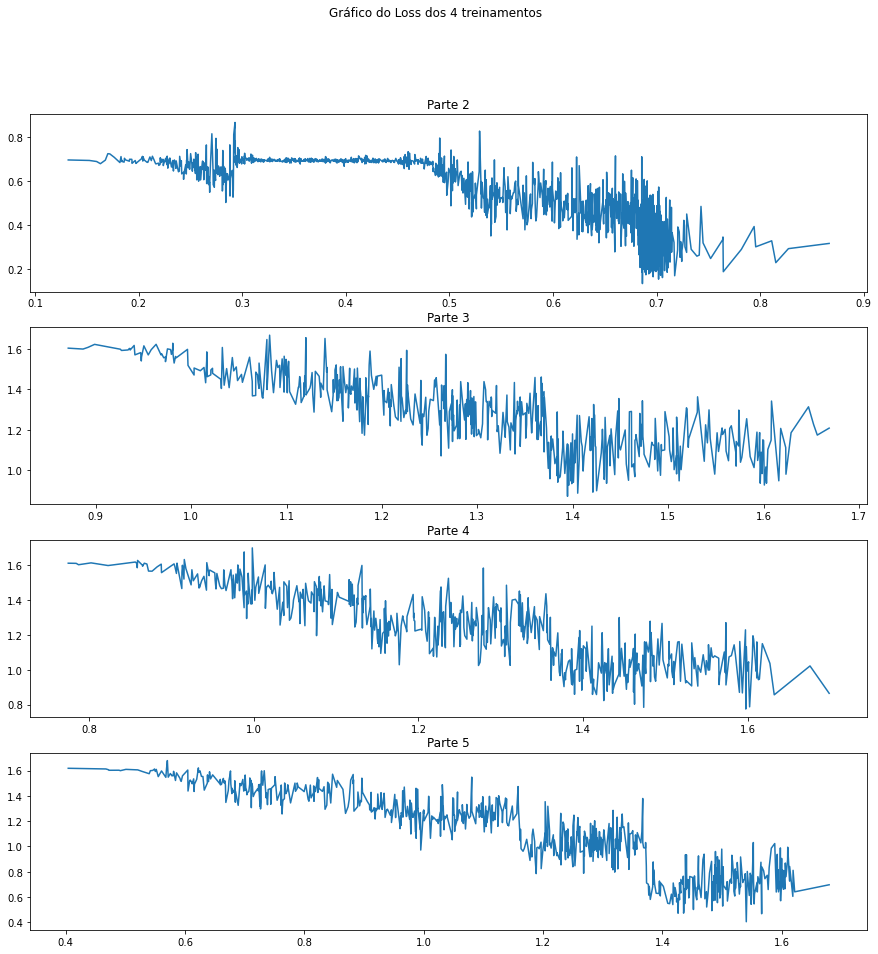

In [54]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(4, figsize=(15,15))
fig.suptitle('Gráfico do Loss dos 4 treinamentos')
axs[0].plot(np.sort(loss_arr1),loss_arr1)
axs[0].title.set_text('Parte 2')
axs[1].plot(np.sort(loss_arr2), loss_arr2)
axs[1].title.set_text('Parte 3')
axs[2].plot(np.sort(loss_arr3), loss_arr3)
axs[2].title.set_text('Parte 4')
axs[3].plot(np.sort(loss_arr4), loss_arr4)
axs[3].title.set_text('Parte 5')